In [2]:
# in this data preparation project we will work on handling outliers and dealing with null values 
# first importing the required libraries 

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

df = pd.read_csv('data.csv')
df.columns = df.columns.str.lower() # making all column headers to lowercase for convenience 

In [3]:
df.sample(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.5000,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,2626,7.2292,NaN,C
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S


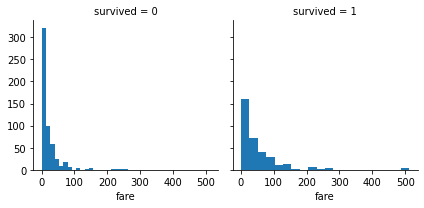

In [4]:
# First task -> Exploring for outlier values -> and Finding and eliminating outliers using histogram plot 

# Now we try to draw a histogram of fares based on 'survived' column 
# this helps to find outliers in 'fare' column in context of survival analysis 

graph = sns.FacetGrid(df, col='survived')
graph.map(plt.hist, "fare", bins=20)

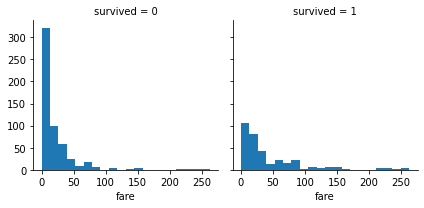

In [5]:
# from histogram, we see an outlier value for survived=1

# operation -> replace the outliers with median value for 'fare' column  
df.loc[df['fare']>400, 'fare'] = df['fare'].median()

# see the output again after operation 

graph = sns.FacetGrid(df, col='survived')
graph.map(plt.hist, "fare", bins=20)

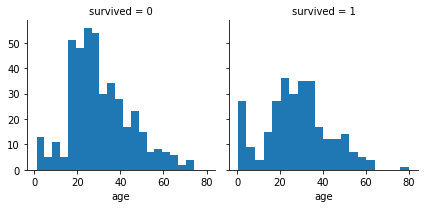

In [6]:
# lets see another histogram of survival based on 'Age' column 
# and carefully check for any outlier value in 'Age' column 

graph = sns.FacetGrid(df, col='survived')
graph.map(plt.hist, "age", bins=20)

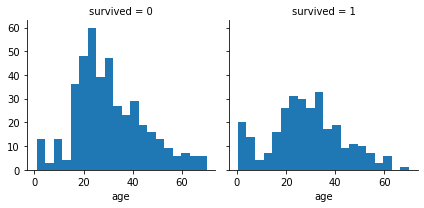

In [7]:
# We found there is an outlier value 80, need to replace it 
# with say -> 70 which is more relevant with existing values  
df.loc[df['age']>70, 'age'] = 70

# Now lets see the output again 
graph = sns.FacetGrid(df, col='survived')
graph.map(plt.hist, "age", bins=20)

In [8]:
# ==== Handling Null values ========

# Loop through all the columns for null values 
for column in df: 
    print(column, ": ", df[column].isnull().sum())

passengerid :  0
survived :  0
pclass :  0
name :  0
sex :  0
age :  177
sibsp :  0
parch :  0
ticket :  0
fare :  0
cabin :  687
embarked :  2


In [9]:
# So, we have null values for Age, Cabin and Embarked columns 
# We can see that, 'age' column has a few null values 
# but 'cabin' column has large number of null values 

# Now we will deal with Age column 
# Will replace nulls with median value and save the dataframe  

df['age'].fillna(df['age'].median(), inplace=True)

# see the output again
for column in df: 
    print(column, ": ", df[column].isnull().sum())

passengerid :  0
survived :  0
pclass :  0
name :  0
sex :  0
age :  0
sibsp :  0
parch :  0
ticket :  0
fare :  0
cabin :  687
embarked :  2


In [10]:
# Now, Embark column is a non-numeric column 
# For fixing null values on Embarked column
# We need to find value counts
# We will replace missing values with more frequent values 

print(df['embarked'].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64


In [11]:
# So we can see that, most frequent value is 'S'
# So we need to replace missing values with 'S'
# Using fillna function as before 

df['embarked'].fillna('S', inplace=True)

# see the output again
for column in df: 
    print(column, ": ", df[column].isnull().sum())

passengerid :  0
survived :  0
pclass :  0
name :  0
sex :  0
age :  0
sibsp :  0
parch :  0
ticket :  0
fare :  0
cabin :  687
embarked :  0


In [12]:
# So Embarked column has been fixed 
# Now, column 'Cabin' has large amount of missing values 
# We need to drop this column 

del df['cabin']

# see the output again
for column in df: 
    print(column, ": ", df[column].isnull().sum())

passengerid :  0
survived :  0
pclass :  0
name :  0
sex :  0
age :  0
sibsp :  0
parch :  0
ticket :  0
fare :  0
embarked :  0


In [13]:
# Now we see no null values in our dataframe 

# ==== END =====

# [OPTIONAL] see some sample data 
df.sample(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,28.0,0,0,370375,7.7500,Q
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,C
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,S
613,614,0,3,"Horgan, Mr. John",male,28.0,0,0,370377,7.7500,Q
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,S
